In [25]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os,sys
from PIL import Image
from sklearn.decomposition import PCA
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.insert(1, './utilities/')

from utility_functions import *

# Load the Data

In [3]:
# Loaded a set of images
root_dir = "../Datasets/training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = min(20, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

n = 10 # Only use 10 images for training

Loading 20 images
satImage_052.png
Loading 20 images
satImage_052.png


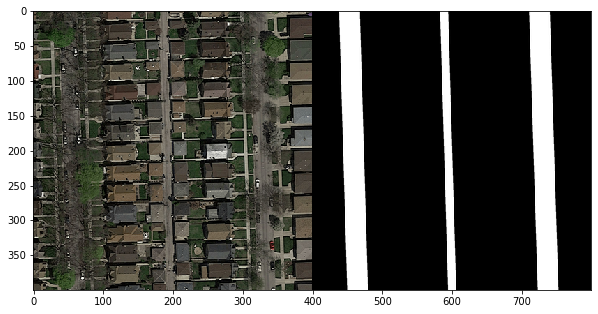

In [4]:
cimg = concatenate_images(imgs[0], gt_imgs[0])
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(cimg, cmap='Greys_r')

# Data Preprocessing

In [71]:
### A ajouter ici: normalization, histograms,..
from sklearn.preprocessing import normalize

for i in range(len(imgs)):
    for j in range(3):
        imgs[i][:,:,j] = normalize(imgs[i][:,:,j])
#imgs = [normalize(imgs[i]) for i in range(len(imgs))]

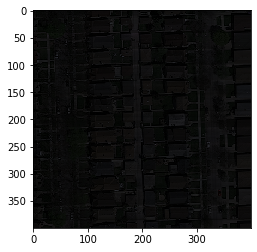

In [70]:
plt.imshow(imgs[0])

## Split the images into smaller patches

In [72]:
# Extract patches from input images
# size = 10(nb_images)*625(n_patches_per_image)*16*16(size_patch)*3(nb_channels)
patch_size = 16# each patch is 16*16 pixels

img_patches = [img_crop(imgs[i], patch_size, patch_size) for i in range(n)]
gt_patches = [img_crop(gt_imgs[i], patch_size, patch_size) for i in range(n)]

# Linearize list of patches
img_patches = np.asarray([img_patches[i][j] for i in range(len(img_patches)) for j in range(len(img_patches[i]))])
gt_patches =  np.asarray([gt_patches[i][j] for i in range(len(gt_patches)) for j in range(len(gt_patches[i]))])
#return array of size 6250 containing all the 625 patches for all the 10 training images
#gt has only 0 or 1 values
#img has an rgb value of size 3 for each point

# Extraction of additional Features from the images

In [73]:
#More features 


In [74]:
get_grey_features(get_gray_mask(imgs[6]))
#laplace_gaussian_edge_detection(imgs[2])

array([0.08  , 0.0525, 0.05  , 0.0525, 0.055 , 0.06  , 0.0575, 0.06  ,
       0.07  , 0.115 , 0.1525, 0.18  , 0.1575, 0.165 , 0.155 , 0.1525,
       0.155 , 0.19  , 0.245 , 0.245 , 0.2275, 0.24  , 0.22  , 0.2225,
       0.195 , 0.19  , 0.2075, 0.215 , 0.1875, 0.16  , 0.1675, 0.19  ,
       0.165 , 0.1575, 0.2025, 0.2275, 0.2375, 0.19  , 0.235 , 0.2125,
       0.3   , 0.255 , 0.26  , 0.2525, 0.255 , 0.2525, 0.2325, 0.2475,
       0.1675, 0.1725, 0.17  , 0.155 , 0.17  , 0.16  , 0.1525, 0.1525,
       0.19  , 0.2125, 0.18  , 0.24  , 0.215 , 0.215 , 0.205 , 0.17  ,
       0.1725, 0.1875, 0.2025, 0.21  , 0.245 , 0.225 , 0.2225, 0.215 ,
       0.2125, 0.2075, 0.225 , 0.19  , 0.2   , 0.1625, 0.1775, 0.1275,
       0.1175, 0.0925, 0.085 , 0.0975, 0.08  , 0.045 , 0.0275, 0.0225,
       0.0225, 0.0175, 0.0175, 0.0225, 0.015 , 0.0175, 0.0125, 0.0225,
       0.035 , 0.045 , 0.045 , 0.0725, 0.0575, 0.0325, 0.0525, 0.035 ,
       0.015 , 0.0175, 0.045 , 0.0275, 0.035 , 0.0475, 0.0325, 0.0725,
      

### Definition of two classes for the patches

In [75]:
# Compute features for each image patch
foreground_threshold = 0.25 # percentage of pixels > 1 required to assign a foreground label to a patch

def value_to_class(v):
    df = np.sum(v)
    if df > foreground_threshold:
        return 1
    else:
        return 0

#2d features is mean + varience of grey values per patch
#for rgb we have already 6 features per patch
#the class foreground has a bit of road in it (25% min)
Y = np.asarray([value_to_class(np.mean(gt_patches[i])) for i in range(len(gt_patches))])

In [76]:
#get_grey_features(get_gray_mask(imgs[0]))

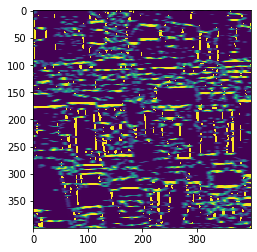

In [77]:
import cv2
import numpy as np


def hough_tranform(img):
    img = img_float_to_uint8(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,150,apertureSize = 3)
    plt.imshow(edges)
    plt.show()
    lines = cv2.HoughLines(edges,1,np.pi/180,200)
    
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
    plt.imshow(img)
    plt.show()
    cv2.imwrite('houghlines3.jpg',img)
    
def proba_hough_tranform(img):
    img = img_float_to_uint8(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #edges = cv2.Canny(gray,50,150,apertureSize = 3)
    edges = ndimage.gaussian_laplace(gray, sigma=2.5)
    plt.imshow(edges)
    plt.show()
    minLineLength = 2
    maxLineGap = 10
    lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength,maxLineGap)
    for x1,y1,x2,y2 in lines[0]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

    cv2.imwrite('houghlines5.jpg',img)
    
proba_hough_tranform(imgs[5])

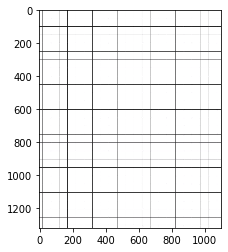

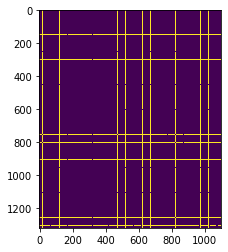

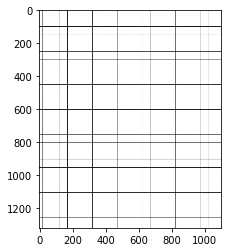

In [78]:
#test line detection
img1 = cv2.imread("../Datasets/grid.jpg") 
plt.imshow(img1)
plt.show()
hough_tranform(img1)

In [79]:
#Features definition
def features_definition(img_patches):
    print("start")
    X1 = np.asarray([ extract_features(img_patches[i]) for i in range(len(img_patches))]) # dim 6
    print("start")
    X2 = np.asarray([ laplace_gaussian_edge_detection(img_patches[i]) for i in range(len(img_patches))]) # dim 6
    print("start")
    X3 = np.asarray([ horizontal_and_vertical_edge_detection(img_patches[i]) for i in range(len(img_patches))]) # dim 6
    print("start")
    X4 = np.asarray([ get_grey_features(get_gray_mask(img_patches[i])) for i in range(len(img_patches))]) # dim patch_size*2
    print("stop")
    X = np.concatenate((X1,X2,X3,X4),axis=1) # dim 13
    X = feature_expansion(X,6) # dim = dim * degree
    X = add_offset(X) # dim = dim + 1
    
    print(X1.shape,X2.shape,X3.shape,X4.shape,X.shape)

    return X

In [80]:
X = features_definition(img_patches)

start
start
start
start
stop
(6250, 6) (6250, 6) (6250, 6) (6250, 32) (6250, 301)


In [81]:
#PCA to determine which features are the most relevant
pca = PCA(n_components=10, svd_solver='full')
pca.fit(X)                 
PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(np.where(pca.components_[0,:] > 0.10))

[0.51869562 0.07892105 0.05430307 0.03946346 0.03572013 0.02423969
 0.02202632 0.01883704 0.01518837 0.01292239]
(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),)


In [82]:
# Print feature statistics

print('Computed ' + str(X.shape[0]) + ' features')
print('Feature dimension = ' + str(X.shape[1]))
print('Number of classes = ' + str(np.max(Y)))  #TODO: fix, length(unique(Y)) 

Y0 = [i for i, j in enumerate(Y) if j == 0]
Y1 = [i for i, j in enumerate(Y) if j == 1]
print('Class 0: ' + str(len(Y0)) + ' samples')
print('Class 1: ' + str(len(Y1)) + ' samples')
#faire diff classes selon orientation NESW de la route

Computed 6250 features
Feature dimension = 301
Number of classes = 1
Class 0: 4915 samples
Class 1: 1335 samples


# Training of the model

## 1) Logistic regression

In [84]:
# train a logistic regression classifier
from sklearn import linear_model

# we create an instance of the classifier and fit the data
logreg = linear_model.LogisticRegression(C=1e4, class_weight="balanced",solver='liblinear',penalty='l1')
logreg.fit(X, Y)

/Users/jerome/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=10000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
# Predict on the training set
Z = logreg.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Z)[0]
Yn = np.nonzero(Y)[0]
recall = len(list(set(Yn) & set(Zn))) / float(len(Z)) #Recall = TPR
precision = len(list(set(Yn) & set(Zn))) / float(len(Y))
F1 = 2*(recall*precision)/(recall+precision)
print('F1 Score = ' + str(F1))

F1 Score = 0.16272


In [103]:
#Best score yet: 0.230769

In [104]:
#we have to add more features !! -> improve edge detection, do PCA

# Display of results

In [105]:
img_idx = 12

Xi = extract_img_features(image_dir + files[img_idx],patch_size)
Zi = logreg.predict(Xi)
plt.scatter(Xi[:, 1], Xi[:, 10], c=Zi, edgecolors='k', cmap=plt.cm.Paired)

ValueError: X has 251 features per sample; expecting 193

In [ ]:
w = gt_imgs[img_idx].shape[0]
h = gt_imgs[img_idx].shape[1]
predicted_im = label_to_img(w, h, patch_size, patch_size, Zi)
cimg = concatenate_images(imgs[img_idx], predicted_im)
fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size 
plt.imshow(cimg, cmap='Greys_r')

new_img = make_img_overlay(imgs[img_idx], predicted_im)

plt.imshow(new_img)